# Carregando valores

In [36]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_table("despesa_ceaps_2022.csv", header=1, sep=";", encoding="latin-1")

In [37]:
dados.isna().sum()

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             934
DATA                    0
DETALHAMENTO         7720
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

In [38]:
round(dados.isna().sum() / dados.shape[0] * 100, 2)

ANO                   0.00
MES                   0.00
SENADOR               0.00
TIPO_DESPESA          0.00
CNPJ_CPF              0.00
FORNECEDOR            0.00
DOCUMENTO             5.57
DATA                  0.00
DETALHAMENTO         46.00
VALOR_REEMBOLSADO     0.00
COD_DOCUMENTO         0.00
dtype: float64

In [39]:
dados.dtypes

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DOCUMENTO            object
DATA                 object
DETALHAMENTO         object
VALOR_REEMBOLSADO    object
COD_DOCUMENTO         int64
dtype: object

In [40]:
dados_copia = dados.copy()
dados_copia["DATA"] = pd.to_datetime(dados_copia.DATA, format="%d/%m/%Y")

In [41]:
dados_copia.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO            object
COD_DOCUMENTO                 int64
dtype: object

In [42]:
dados_copia["VALOR_REEMBOLSADO"] = dados_copia["VALOR_REEMBOLSADO"].apply(lambda x: x.replace(",", "."))
dados_copia["VALOR_REEMBOLSADO"] = pd.to_numeric(dados_copia["VALOR_REEMBOLSADO"], downcast='float')
dados_copia["VALOR_REEMBOLSADO"] = dados_copia["VALOR_REEMBOLSADO"].apply(lambda x: round(x,2))

In [43]:
dados_copia.dtypes

ANO                           int64
MES                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
COD_DOCUMENTO                 int64
dtype: object

In [44]:
dados_copia.isna().sum()

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             934
DATA                    0
DETALHAMENTO         7720
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

<Axes: >

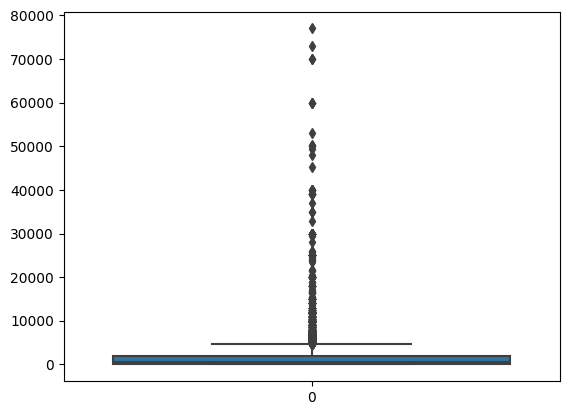

In [45]:
sns.boxplot(dados_copia["VALOR_REEMBOLSADO"])

In [46]:
index = np.where(dados_copia["VALOR_REEMBOLSADO"]<5000)
outlier = np.where(dados_copia["VALOR_REEMBOLSADO"]>=5000)

c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='VALOR_REEMBOLSADO', ylabel='Count'>

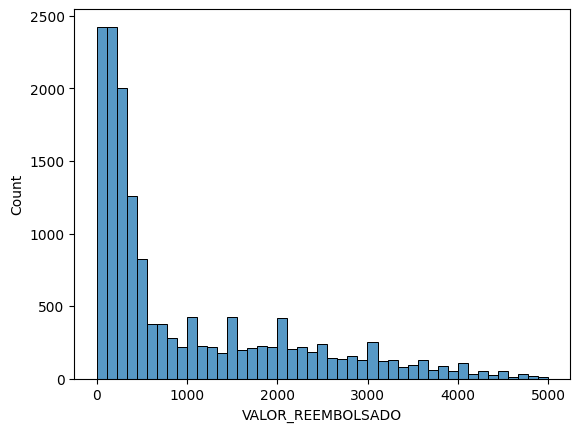

In [47]:
sns.histplot(data=dados_copia.iloc[index]["VALOR_REEMBOLSADO"])

c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='VALOR_REEMBOLSADO', ylabel='Count'>

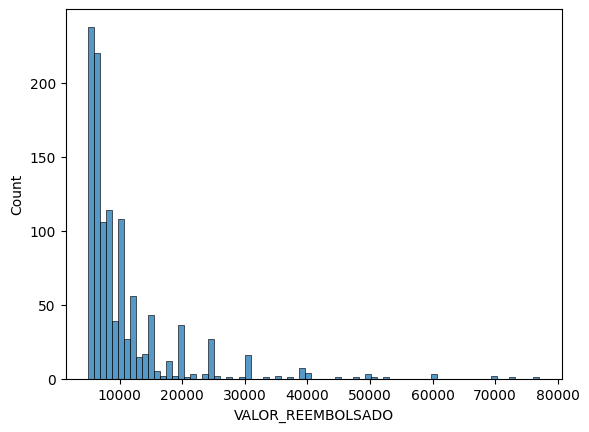

In [48]:
sns.histplot(data=dados_copia.iloc[outlier]["VALOR_REEMBOLSADO"])

In [49]:
index_soma = round(dados_copia.iloc[index]["VALOR_REEMBOLSADO"].sum(),2)
outlier_soma = round(dados_copia.iloc[outlier]["VALOR_REEMBOLSADO"].sum(),2)
diferenca = index_soma - outlier_soma

In [50]:
print("O valor do primeiro histograma é de {}\nO valor do segundo histograma é de {}\nA diferença é de {}".format(index_soma, outlier_soma, diferenca))

O valor do primeiro histograma é de 15564945.19
O valor do segundo histograma é de 11728183.41
A diferença é de 3836761.7799999993


c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dty

<Axes: >

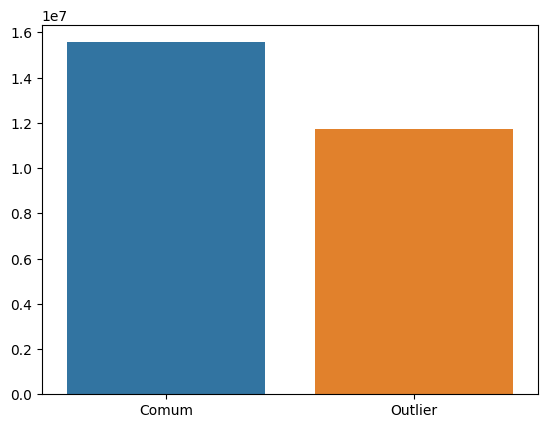

In [55]:
ax = sns.barplot(y=[index_soma,outlier_soma], x=[1,2])
ax.set(xticklabels=["Comum", "Outlier"])
ax

## Com base no coficiente assimetria de person temos uma assimetria forte, já que o resultado foi maior que 1

In [16]:
media = dados_copia["VALOR_REEMBOLSADO"].mean()
mediana = dados_copia["VALOR_REEMBOLSADO"].median()
desvio = dados_copia["VALOR_REEMBOLSADO"].std()
As = (3*(media-mediana))/desvio
As

1.0216210144657667

# Analisando os dados

In [17]:
dados_copia.describe()

,ANO,MES,DATA,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,16782.0,16782.000000,16782,16782.000000,1.678200e+04
mean,2022.0,6.258372,2022-06-19 02:01:55.838398208,1626.333488,2.183257e+06
min,2022.0,1.000000,2000-12-08 00:00:00,0.010000,2.172906e+06
25%,2022.0,3.000000,2022-03-29 00:00:00,200.000000,2.178410e+06
50%,2022.0,6.000000,2022-06-14 00:00:00,480.000000,2.183250e+06
75%,2022.0,9.000000,2022-09-16 18:00:00,2000.000000,2.188074e+06
max,2022.0,12.000000,2023-12-23 00:00:00,77012.000000,2.198297e+06
std,0.0,3.302406,NaN,3366.219387,5.745640e+03


In [18]:
dados_copia.query("VALOR_REEMBOLSADO < 10")

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
284,2022,10,ALESSANDRO VIEIRA,"Contratação de consultorias, assessorias, pesq...",25.012.398/0001-07,GOOGLE CLOUD BRASIL COMPUTAÇÃO E SERVIÇOS DE D...,04429484,2022-10-02,NaN,8.10,2189352
958,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,MGMLGZ,2022-01-19,"Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...",0.01,2173057
959,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,NN2E6U,2022-01-19,"Companhia Aérea: AZUL, Localizador: NN2E6U. Pa...",3.00,2173056
1298,2022,2,CARLOS VIANA,"Locomoção, hospedagem, alimentação, combustíve...",10.215.988/0001-60,COMPANHIA DE LOCACAO DAS AMERICAS,0004912053,2022-03-30,NaN,7.78,2179187
1548,2022,8,CARLOS VIANA,Aquisição de material de consumo para uso no e...,45.543.915/0157-07,CARREFOUR COMERCIO E INDUSTRIA LTDA,377936,2022-08-03,NaN,7.90,2186159
...,...,...,...,...,...,...,...,...,...,...,...
12686,2022,9,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,113031051,2022-09-19,Despesa com suporte técnico.,4.72,2189731
12716,2022,10,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,113640657,2022-10-05,Despesa com serviço de suporte técnico em info...,8.84,2188954
12750,2022,11,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,114819706,2022-11-04,Despesa com suporte técnico em informática,8.84,2189253
12787,2022,12,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,116099895,2022-12-08,Despesa com serviço de suporte técnico.,8.90,2194178


In [19]:
index = dados_copia.query("VALOR_REEMBOLSADO < 10").index
dados.iloc[index]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
284,2022,10,ALESSANDRO VIEIRA,"Contratação de consultorias, assessorias, pesq...",25.012.398/0001-07,GOOGLE CLOUD BRASIL COMPUTAÇÃO E SERVIÇOS DE D...,04429484,02/10/2022,NaN,"8,1",2189352
958,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,MGMLGZ,19/01/2022,"Companhia Aérea: AZUL, Localizador: MGMLGZ. Pa...",",01",2173057
959,2022,1,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",09.296.295/0001-60,AZUL,NN2E6U,19/01/2022,"Companhia Aérea: AZUL, Localizador: NN2E6U. Pa...",3,2173056
1298,2022,2,CARLOS VIANA,"Locomoção, hospedagem, alimentação, combustíve...",10.215.988/0001-60,COMPANHIA DE LOCACAO DAS AMERICAS,0004912053,30/03/2022,NaN,"7,78",2179187
1548,2022,8,CARLOS VIANA,Aquisição de material de consumo para uso no e...,45.543.915/0157-07,CARREFOUR COMERCIO E INDUSTRIA LTDA,377936,03/08/2022,NaN,"7,9",2186159
...,...,...,...,...,...,...,...,...,...,...,...
12686,2022,9,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,113031051,19/09/2022,Despesa com suporte técnico.,"4,72",2189731
12716,2022,10,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,113640657,05/10/2022,Despesa com serviço de suporte técnico em info...,"8,84",2188954
12750,2022,11,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,114819706,04/11/2022,Despesa com suporte técnico em informática,"8,84",2189253
12787,2022,12,PAULO PAIM,"Contratação de consultorias, assessorias, pesq...",01.109.184/0004-38,UNIVERSO ONLINE SA,116099895,08/12/2022,Despesa com serviço de suporte técnico.,"8,9",2194178


## Gráficos

c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Gabriel\Documents\faculdade\Ciência de Dados\.venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='MES'>

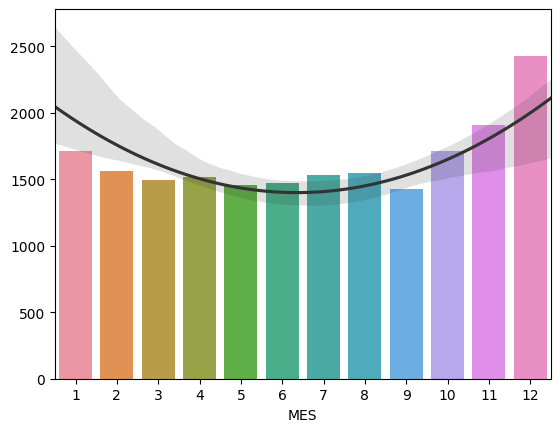

In [20]:
mes = dados_copia.groupby('MES')["VALOR_REEMBOLSADO"].mean().index
valores = dados_copia.groupby('MES')["VALOR_REEMBOLSADO"].mean().values
sns.barplot(x=mes,y=valores)
sns.regplot(x=mes, y=valores,scatter=False, truncate=False, order=2, color=".2")

<Axes: xlabel='Mês', ylabel='Valor Reembolsado'>

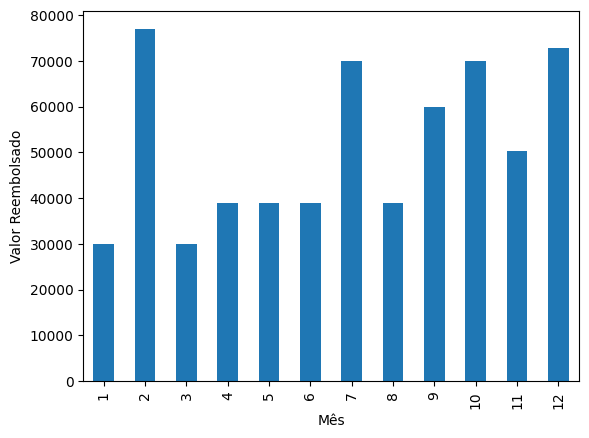

In [21]:
dados_copia.groupby('MES')["VALOR_REEMBOLSADO"].max().plot(kind='bar',ylabel="Valor Reembolsado",xlabel="Mês")

<Axes: xlabel='Mês', ylabel='Valor Reembolsado'>

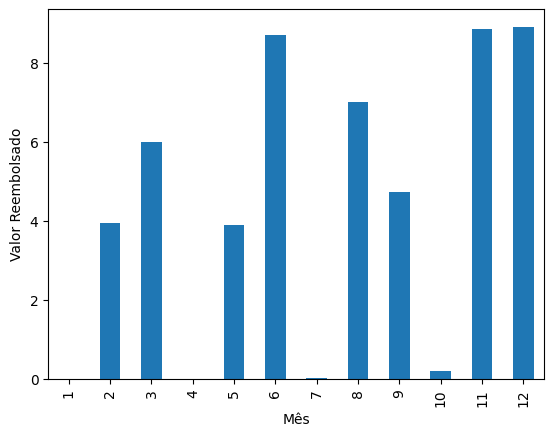

In [22]:
dados_copia.groupby('MES')["VALOR_REEMBOLSADO"].min().plot(kind='bar',ylabel="Valor Reembolsado",xlabel="Mês")

In [56]:
dados_copia.columns

Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DOCUMENTO', 'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO',
       'COD_DOCUMENTO'],
      dtype='object')

[[Text(0, 0, 'Aluguel de Imóveis'),
  Text(1, 0, 'Aquisição de Materiais'),
  Text(2, 0, 'Contratação de Consultoria'),
  Text(3, 0, 'Divulgação Atividade Parlamentar'),
  Text(4, 0, 'Locação, Hospedagem, alimentação'),
  Text(5, 0, 'Passagens'),
  Text(6, 0, 'Segurança Privada')]]

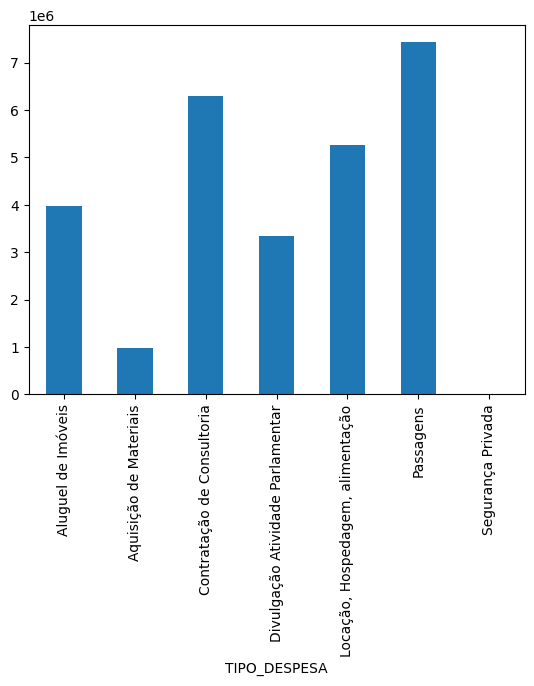

In [70]:
ax = dados_copia.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"].sum().plot(kind="bar")
ax.set(xticklabels=["Aluguel de Imóveis", "Aquisição de Materiais","Contratação de Consultoria","Divulgação Atividade Parlamentar", "Locação, Hospedagem, alimentação","Passagens","Segurança Privada"])

In [126]:
dados_filtrado = dados_copia[dados_copia.TIPO_DESPESA == "Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar"]
consultores = dados_filtrado.groupby("CNPJ_CPF").size().sort_values(ascending=False).head(10).index

In [127]:
dados_filtrado.groupby("CNPJ_CPF").size().sort_values(ascending=False).head(10)

CNPJ_CPF
01.109.184/0004-38    35
05.305.671/0001-84    24
02.351.877/0001-52    20
23.425.589/0001-75    20
25.012.398/0001-07    19
30.727.829/0001-51    13
23.412.247/0001-10    12
15.183.160/0001-90    12
16.924.825/0001-32    12
37.921.617/0001-50    12
dtype: int64

In [133]:
dados_copia[dados_copia["CNPJ_CPF"].isin(consultores)].groupby("FORNECEDOR")["VALOR_REEMBOLSADO"].sum()

FORNECEDOR
AMAZON AWS SERVICOS BRASIL LTDA                              1158.19
Alisson da Silva Barbosa/NORDHIC DIGITAL                    41954.00
BUNKER BRAIN AUDIOVISUAL EIRELI                            134799.09
CYBERWEB NETWORKS LTDA                                       4316.49
Conlegis                                                    80000.00
GOOGLE CLOUD BRASIL COMPUTAÇÃO E SERVIÇOS DE DADOS LTDA      1613.80
Google Cloud Brasil Computação e Serviços de Dados LTDA      1620.00
LOCAWEB SERVICOS DE INTERNET S                               2599.10
LOCAWEB SERVICOS DE INTERNET S.A.                             532.20
LOCAWEB SERVIÇOS DE INTERNET SA                              1336.06
Locaweb Serviços de Internet S/A                              947.12
PARLABRASIL EIRELI                                          30681.00
UNIVERSO ONLINE SA                                           2041.78
UPLINK Assessoria e Consultoria Empresarial Eireli -ME     360000.00
Name: VALOR_REEMBOLSADO

In [134]:
dados_copia.TIPO_DESPESA.unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Divulgação da atividade parlamentar',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Serviços de Segurança Privada'], dtype=object)